In [1]:
import sys
import os

# Add the project root directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import numpy as np
import joblib
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from src.data_utils import prepare_decay_experiment

# Step 1: Initialize the Timeline Split
# Using the local path for California Housing CSV
DATA_PATH = '../data/raw/housing.csv'
baseline_df, future_df = prepare_decay_experiment(DATA_PATH)

# Define features and target (Predicting median_house_value)
target = 'median_house_value'
X_baseline = baseline_df.drop(columns=[target, 'ocean_proximity']) # Drop categorical for baseline
y_baseline = baseline_df[target]

⚠️ Initial missingness detected. Dropping nulls for clean baseline.
📊 Data Split Complete:
 - Baseline (Past) Size: 14303
 - Future (Production) Size: 6130
💾 Saved: ../data/processed/baseline_stable.csv
💾 Saved: ../data/processed/future_unseen.csv


In [2]:
# Step 2: Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_baseline, y_baseline)

# Internal Validation (Sanity Check)
y_pred = model.predict(X_baseline)
rmse = np.sqrt(mean_squared_error(y_baseline, y_pred))
r2 = r2_score(y_baseline, y_pred)

print(f"✅ Baseline Training Complete.")
print(f" - RMSE: ${rmse:,.2f}")
print(f" - R2 Score: {r2:.4f}")

✅ Baseline Training Complete.
 - RMSE: $18,422.42
 - R2 Score: 0.9745


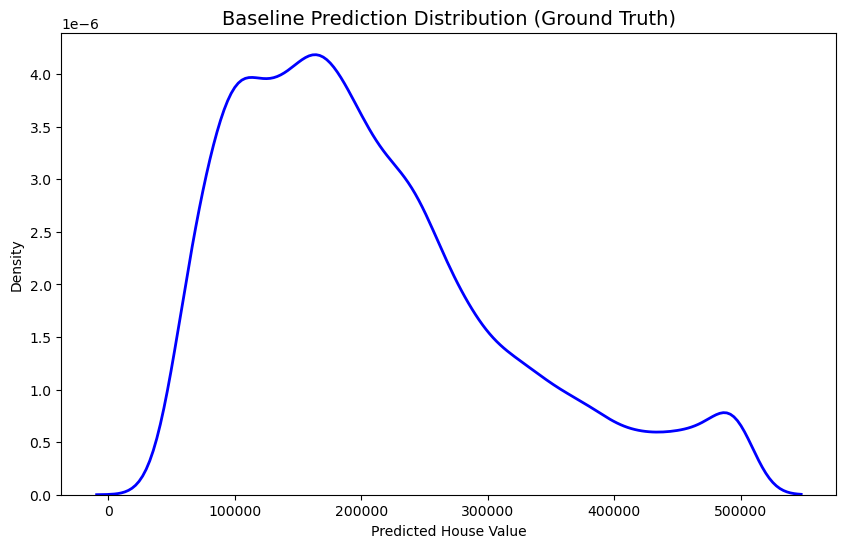

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Distribution Profiling
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred, label='Baseline Predictions', color='blue', lw=2)
plt.title("Baseline Prediction Distribution (Ground Truth)", fontsize=14)
plt.xlabel("Predicted House Value")
plt.savefig('../reports/figures/baseline_prediction_dist.png')
plt.show()

# Store Feature Importance for future Comparison
importance_df = pd.DataFrame({
    'Feature': X_baseline.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [4]:
import joblib

# Step 4: Persistence
if not os.path.exists('../models/'):
    os.makedirs('../models/')

joblib.dump(model, '../models/golden_model.pkl')
joblib.dump(X_baseline.columns.tolist(), '../models/feature_list.pkl')

print("💾 Model and Stability Profile serialized to /models/")

💾 Model and Stability Profile serialized to /models/


In [5]:
pip install src

  Using cached src-0.0.7.zip (6.3 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for src
Failed to build src
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Building 'src' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'src'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [71 lines of output]
  C:\Users\tamil\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'tests_require'
    warnings.warn(msg)
  running bdist_wheel
  running build
  running build_py
  creating build\lib\src
  copying src\__init__.py -> build\lib\src
  running egg_info
  writing src.egg-info\PKG-INFO
  writing dependency_links to src.egg-info\de